# Data Exploration

### Use cases for About Excel/SPSS/Google Sheets
* experimental psych - report
* planning for grad school - organize timelines & stuff

### Like 
* ease of calculations
* it's organized - generates organized summaries/reports
* functions built in that can do a lot of things
* can do calculation on entire row/multiple columns

### Dislike
* data input is manual/often cell by cell
* hard to navigate - confusing UI
* not great with large data files

### Things we'd like to do
*  

## Objectives
1. loading data from tables (excel files, csvs)

1. cleaning misformed data and missing values

1. filtering data using keywords and logical constraints


# Load Data Using Pandas

Pandas is a Python library (set of functions somebody else wrote) for doing data analysis. 

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [2]:
import pandas as pd #import is how we load libraries
pd.__version__

'0.24.1'

In [3]:
# ../data/abuse.csv is where I store the file - change to your location
# file is stored in df variable
df = pd.read_csv("../data/abuse.csv")
df = pd.read_csv("https://raw.githubusercontent.com/ccnypsych/psy31170/master/data/abuse.csv")

In [4]:
df

,characteristic,Male-%,Male-S.E.,Male-estimate,Female-%,Female-S.E.,Female-estimate,Total-%,Total-S.E.,Total-estimate,race-ethnicity
0,Total,6.93,0.28,6906,2.55,0.16,2762,4.65,0.18,9668,Total
1,18–29,9.35,0.61,2110,4.57,0.39,1041,6.95,0.39,3151,Total
2,30–44,8.69,0.49,2742,3.31,0.28,1080,5.95,0.31,3822,Total
3,45–64,5.50,0.43,1719,1.70,0.20,566,3.54,0.25,2286,Total
4,65+,2.36,0.32,335,0.38,0.11,75,1.21,0.15,410,Total
5,Total,7.45,0.33,5276,2.92,0.19,2236,5.10,0.21,7511,White
6,18–29,10.19,0.81,1405,5.56,0.54,777,7.86,0.50,2182,White
7,30–44,10.10,0.63,2166,4.13,0.38,902,7.09,0.40,3068,White
8,45–64,5.97,0.51,1425,2.02,0.26,499,3.96,0.30,1925,White
9,65+,2.38,0.35,279,0.36,0.10,58,1.21,0.16,336,White


# Quick peek at the data:
* __head__: first 5 rows
* __tail__: last 5 rows

In [6]:
df.head()

,characteristic,Male-%,Male-S.E.,Male-estimate,Female-%,Female-S.E.,Female-estimate,Total-%,Total-S.E.,Total-estimate,race-ethnicity
0,Total,6.93,0.28,6906,2.55,0.16,2762,4.65,0.18,9668,Total
1,18–29,9.35,0.61,2110,4.57,0.39,1041,6.95,0.39,3151,Total
2,30–44,8.69,0.49,2742,3.31,0.28,1080,5.95,0.31,3822,Total
3,45–64,5.50,0.43,1719,1.70,0.20,566,3.54,0.25,2286,Total
4,65+,2.36,0.32,335,0.38,0.11,75,1.21,0.15,410,Total


In [7]:
df.tail()

,characteristic,Male-%,Male-S.E.,Male-estimate,Female-%,Female-S.E.,Female-estimate,Total-%,Total-S.E.,Total-estimate,race-ethnicity
25,Total,6.21,0.50,759,1.65,0.23,195,3.97,0.30,953,Hispanic/Latino
26,18–29,9.08,1.07,400,3.04,0.63,116,6.28,0.63,516,Hispanic/Latino
27,30–44,4.88,0.59,219,1.46,0.33,61,3.23,0.37,281,Hispanic/Latino
28,45–64,4.35,0.84,111,0.63,0.36,17,2.43,0.39,128,Hispanic/Latino
29,65+,3.69,1.62,29,0.00,0.00,0,1.56,0.66,29,Hispanic/Latino


# Snapshots of the spreadsheet
* info - column datatypes
* describe - statistics

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
characteristic     30 non-null object
Male-%             30 non-null float64
Male-S.E.          30 non-null float64
Male-estimate      30 non-null int64
Female-%           30 non-null float64
Female-S.E.        30 non-null float64
Female-estimate    30 non-null int64
Total-%            30 non-null float64
Total-S.E.         30 non-null float64
Total-estimate     30 non-null int64
race-ethnicity     30 non-null object
dtypes: float64(6), int64(3), object(2)
memory usage: 2.7+ KB


In [9]:
df.describe()

,Male-%,Male-S.E.,Male-estimate,Female-%,Female-S.E.,Female-estimate,Total-%,Total-S.E.,Total-estimate
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,5.840667,1.112667,920.133333,2.254000,0.646667,368.333333,3.962333,0.671000,1289.033333
std,3.175372,1.110874,1610.636343,1.969584,1.007213,667.518840,2.425230,0.732946,2275.267919
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.822500,0.502500,57.750000,0.442500,0.190000,21.000000,2.242500,0.300000,92.250000
50%,5.605000,0.760000,192.500000,1.675000,0.290000,63.000000,3.930000,0.395000,267.500000
75%,7.465000,1.475000,1243.500000,3.745000,0.440000,423.000000,5.587500,0.667500,1682.000000
max,15.250000,5.680000,6906.000000,6.680000,4.000000,2762.000000,10.350000,3.110000,9668.000000


# Let's look at columns
* Remember dictionaries? Same thing:
    * df['column name']
    * df[['list of columns']]

In [10]:
df.columns

Index(['characteristic', 'Male-%', 'Male-S.E.', 'Male-estimate', 'Female-%',
       'Female-S.E.', 'Female-estimate', 'Total-%', 'Total-S.E.',
       'Total-estimate', 'race-ethnicity'],
      dtype='object')

In [11]:
df['Male-%'].head()

0    6.93
1    9.35
2    8.69
3    5.50
4    2.36
Name: Male-%, dtype: float64

Let's get characteristics too...

In [12]:
df[['characteristic', 'race-ethnicity', 'Male-%']].head() #remember head is only top 5

,characteristic,race-ethnicity,Male-%
0,Total,Total,6.93
1,18–29,Total,9.35
2,30–44,Total,8.69
3,45–64,Total,5.50
4,65+,Total,2.36


# How is the data organized? 

![tidy data organization - rows = observations, columns=variables, measurments=cells](figs/L06/data_formatting.png?)
(inspired by Munzner and E. Maguire, Visualization analysis & design. Boca Raton, FL: CRC Press, 2015.)

* __Dataset__: collection of related information
* __Variable__: attribute of the dataset
* __Observation__: entry in the dataset
* __Measurement__: single data point

## Measurement Type:
* __Quantitative__: how much?
  + __Discrete__: countable values 
  + __Continuous__: any numerical variable with a  technically infinite number of increments
* __Qualitative__: what kind?
  + __Categorical__: qualitative data that can be sorted into groups
  + __Interviews, Observations, Documents__

## Measurement Scales
* __Quantitative__:
  + __Interval__: difference between` values means something quantifiable 
  + __Ratio__: interval data with a floor
* __Categorical__:
  + __Nominal__: names of categories that are mutually exclusive 
  + __Ordinal__: values with a natural ordering like best to worst 

 ![image of axis, where rows=axis 0, columns = axis 1](figs/L06/axis.jpg)
[stackoverflow](https://stackoverflow.com/questions/25773245/ambiguity-in-pandas-dataframe-numpy-array-axis-definition)

# Let's see that column

In [13]:
# matplotlib is one of the Python visualization libraries
import matplotlib
%matplotlib inline

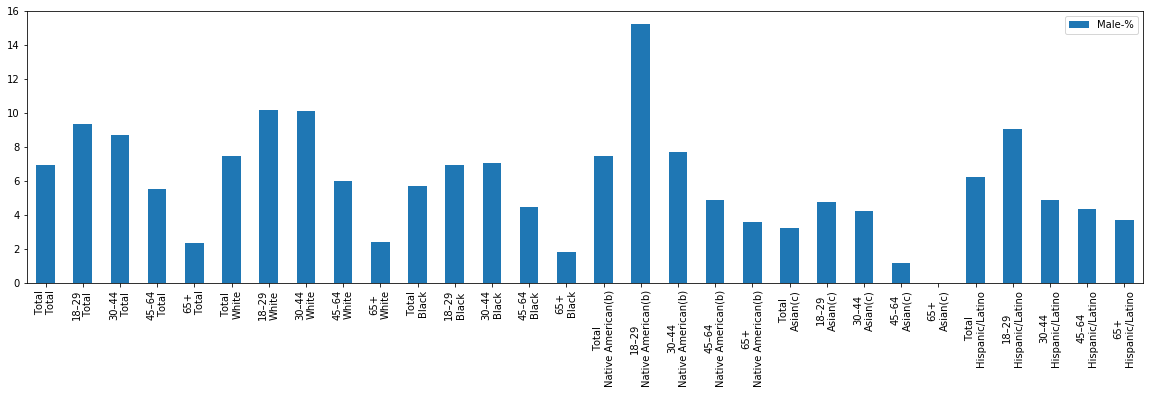

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,5))
_ = df[['characteristic', 'Male-%']].plot.bar(ax=ax)
labels = [f'{c}\n{re}' for c,re in zip(df['characteristic'],df['race-ethnicity'])]
_ = ax.set_xticklabels(labels, rotation=90)

# Practice:
* Select and plot a different column

# How do we select rows?

![diagram of boolean indexing. Shows first row of numbers, second row of true first values, rows in third column are blank where rows in second are false, remaining values in third form 4th column](figs/L06/masking.png)
Modified from [Software Carpentry](https://v4.software-carpentry.org/matrix/indexing.html)

In [31]:
df.head()

,characteristic,Male-%,Male-S.E.,Male-estimate,Female-%,Female-S.E.,Female-estimate,Total-%,Total-S.E.,Total-estimate,race-ethnicity
0,Total,6.93,0.28,6906,2.55,0.16,2762,4.65,0.18,9668,Total
1,18–29,9.35,0.61,2110,4.57,0.39,1041,6.95,0.39,3151,Total
2,30–44,8.69,0.49,2742,3.31,0.28,1080,5.95,0.31,3822,Total
3,45–64,5.50,0.43,1719,1.70,0.20,566,3.54,0.25,2286,Total
4,65+,2.36,0.32,335,0.38,0.11,75,1.21,0.15,410,Total


Where characteristic = total is a double count, so let's remove that!

In [32]:
df['characteristic'].str.match("Total").head()

0     True
1    False
2    False
3    False
4    False
Name: characteristic, dtype: bool

In [33]:
total_rows = df['characteristic'].str.match("Total")
df[total_rows]

,characteristic,Male-%,Male-S.E.,Male-estimate,Female-%,Female-S.E.,Female-estimate,Total-%,Total-S.E.,Total-estimate,race-ethnicity
0,Total,6.93,0.28,6906,2.55,0.16,2762,4.65,0.18,9668,Total
5,Total,7.45,0.33,5276,2.92,0.19,2236,5.10,0.21,7511,White
10,Total,5.71,0.58,574,1.41,0.19,182,3.29,0.30,756,Black
15,Total,7.47,1.65,157,4.18,1.25,97,5.75,1.02,253,Native American(b)
20,Total,3.20,0.79,140,1.13,0.41,53,2.13,0.46,193,Asian(c)
25,Total,6.21,0.50,759,1.65,0.23,195,3.97,0.30,953,Hispanic/Latino


Negation of a condition (not) is `~`

In [35]:
df[~total_rows].head()

,characteristic,Male-%,Male-S.E.,Male-estimate,Female-%,Female-S.E.,Female-estimate,Total-%,Total-S.E.,Total-estimate,race-ethnicity
1,18–29,9.35,0.61,2110,4.57,0.39,1041,6.95,0.39,3151,Total
2,30–44,8.69,0.49,2742,3.31,0.28,1080,5.95,0.31,3822,Total
3,45–64,5.50,0.43,1719,1.70,0.20,566,3.54,0.25,2286,Total
4,65+,2.36,0.32,335,0.38,0.11,75,1.21,0.15,410,Total
6,18–29,10.19,0.81,1405,5.56,0.54,777,7.86,0.50,2182,White


# Still double counting 'cause of total race ethnicity, let's use compound logic

In [40]:
# or: |, and: &
total_rows = (df['characteristic'].str.match("Total") |
              df['race-ethnicity'].str.match("Total"))
df[total_rows]

,characteristic,Male-%,Male-S.E.,Male-estimate,Female-%,Female-S.E.,Female-estimate,Total-%,Total-S.E.,Total-estimate,race-ethnicity
0,Total,6.93,0.28,6906,2.55,0.16,2762,4.65,0.18,9668,Total
1,18–29,9.35,0.61,2110,4.57,0.39,1041,6.95,0.39,3151,Total
2,30–44,8.69,0.49,2742,3.31,0.28,1080,5.95,0.31,3822,Total
3,45–64,5.50,0.43,1719,1.70,0.20,566,3.54,0.25,2286,Total
4,65+,2.36,0.32,335,0.38,0.11,75,1.21,0.15,410,Total
5,Total,7.45,0.33,5276,2.92,0.19,2236,5.10,0.21,7511,White
10,Total,5.71,0.58,574,1.41,0.19,182,3.29,0.30,756,Black
15,Total,7.47,1.65,157,4.18,1.25,97,5.75,1.02,253,Native American(b)
20,Total,3.20,0.79,140,1.13,0.41,53,2.13,0.46,193,Asian(c)
25,Total,6.21,0.50,759,1.65,0.23,195,3.97,0.30,953,Hispanic/Latino


In [37]:
# negation to pull out new rows
dfc = df[~total_rows]
dfc.head()

,characteristic,Male-%,Male-S.E.,Male-estimate,Female-%,Female-S.E.,Female-estimate,Total-%,Total-S.E.,Total-estimate,race-ethnicity
6,18–29,10.19,0.81,1405,5.56,0.54,777,7.86,0.50,2182,White
7,30–44,10.10,0.63,2166,4.13,0.38,902,7.09,0.40,3068,White
8,45–64,5.97,0.51,1425,2.02,0.26,499,3.96,0.30,1925,White
9,65+,2.38,0.35,279,0.36,0.10,58,1.21,0.16,336,White
11,18–29,6.92,1.28,166,2.10,0.45,68,4.28,0.67,254,Black


In [38]:
dfc.describe() # hos is this different from the one that includes total?

,Male-%,Male-S.E.,Male-estimate,Female-%,Female-S.E.,Female-estimate,Total-%,Total-S.E.,Total-estimate
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,5.617500,1.370000,344.300000,2.191000,0.799500,138.150000,3.816500,0.828000,483.40000
std,3.592297,1.264291,595.694031,2.242416,1.192461,263.824757,2.721668,0.843954,855.52221
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.665000,0.620000,36.500000,0.222500,0.180000,3.750000,2.025000,0.357500,36.50000
50%,4.810000,0.895000,87.500000,1.485000,0.345000,47.000000,3.570000,0.480000,119.00000
75%,7.197500,1.667500,248.250000,3.947500,0.562500,65.750000,4.832500,0.877500,310.50000
max,15.250000,5.680000,2166.000000,6.680000,4.000000,902.000000,10.350000,3.110000,3068.00000


In [41]:
df.describe()

,Male-%,Male-S.E.,Male-estimate,Female-%,Female-S.E.,Female-estimate,Total-%,Total-S.E.,Total-estimate
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,5.840667,1.112667,920.133333,2.254000,0.646667,368.333333,3.962333,0.671000,1289.033333
std,3.175372,1.110874,1610.636343,1.969584,1.007213,667.518840,2.425230,0.732946,2275.267919
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.822500,0.502500,57.750000,0.442500,0.190000,21.000000,2.242500,0.300000,92.250000
50%,5.605000,0.760000,192.500000,1.675000,0.290000,63.000000,3.930000,0.395000,267.500000
75%,7.465000,1.475000,1243.500000,3.745000,0.440000,423.000000,5.587500,0.667500,1682.000000
max,15.250000,5.680000,6906.000000,6.680000,4.000000,2762.000000,10.350000,3.110000,9668.000000


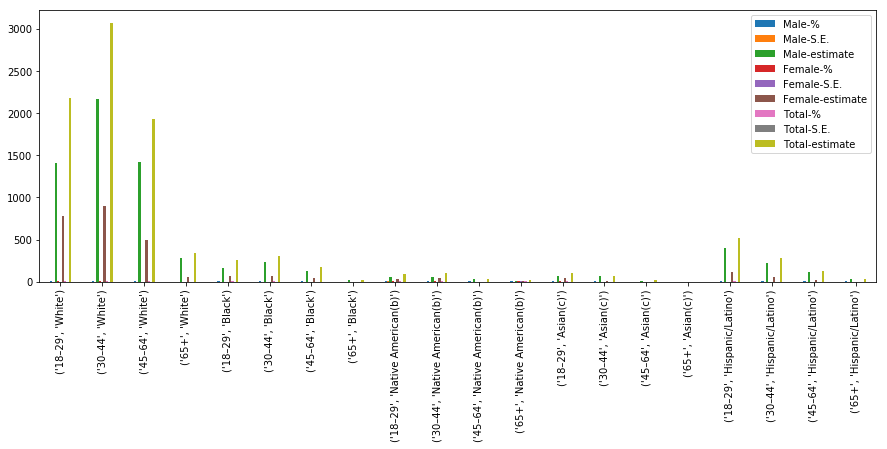

In [42]:
fig, ax = plt.subplots(figsize=(15,5))
_ = dfc.plot.bar(ax=ax)
_ = ax.set_xticklabels(zip(dfc['characteristic'], dfc['race-ethnicity']))

That's a bit busy, let's just pull out 'White'

In [43]:
white = dfc[dfc['race-ethnicity'].str.match("White")]
white

,characteristic,Male-%,Male-S.E.,Male-estimate,Female-%,Female-S.E.,Female-estimate,Total-%,Total-S.E.,Total-estimate,race-ethnicity
6,18–29,10.19,0.81,1405,5.56,0.54,777,7.86,0.50,2182,White
7,30–44,10.10,0.63,2166,4.13,0.38,902,7.09,0.40,3068,White
8,45–64,5.97,0.51,1425,2.02,0.26,499,3.96,0.30,1925,White
9,65+,2.38,0.35,279,0.36,0.10,58,1.21,0.16,336,White


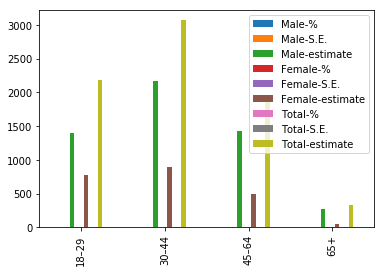

In [44]:
fig, ax = plt.subplots()
_ = white.plot.bar(ax =ax)
_ = ax.set_xticklabels(white['characteristic'])

# Why are half the columns missing?
comparing apples to oranges to cats

In [45]:
dfc.columns

Index(['characteristic', 'Male-%', 'Male-S.E.', 'Male-estimate', 'Female-%',
       'Female-S.E.', 'Female-estimate', 'Total-%', 'Total-S.E.',
       'Total-estimate', 'race-ethnicity'],
      dtype='object')

In [46]:
percent = dfc[['characteristic', 'race-ethnicity','Male-%', 'Female-%']]
percent

,characteristic,race-ethnicity,Male-%,Female-%
6,18–29,White,10.19,5.56
7,30–44,White,10.10,4.13
8,45–64,White,5.97,2.02
9,65+,White,2.38,0.36
11,18–29,Black,6.92,2.10
12,30–44,Black,7.04,1.51
13,45–64,Black,4.48,1.25
14,65+,Black,1.79,0.12
16,18–29,Native American(b),15.25,6.68
17,30–44,Native American(b),7.67,6.52


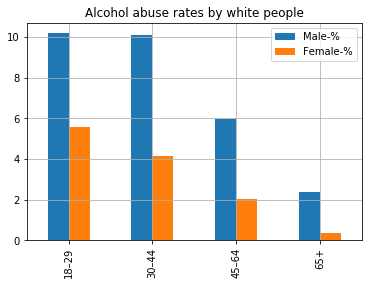

In [50]:
# Lets look at this subset
fig, ax = plt.subplots()
_ = ax.set_title("Alcohol abuse rates by white people")
_ = percent[percent['race-ethnicity'].str.match('White')].plot.bar(ax=ax)
_ = ax.set_xticklabels(percent['characteristic'])
_ = ax.grid()

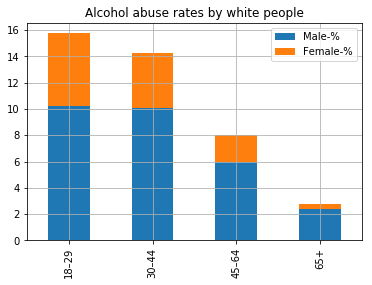

In [51]:
# Lets look at this subset
fig, ax = plt.subplots()
_ = ax.set_title("Alcohol abuse rates by white people")
_ = percent[percent['race-ethnicity'].str.match('White')].plot.bar(ax=ax, stacked=True)
_ = ax.set_xticklabels(percent['characteristic'])
_ = ax.grid()

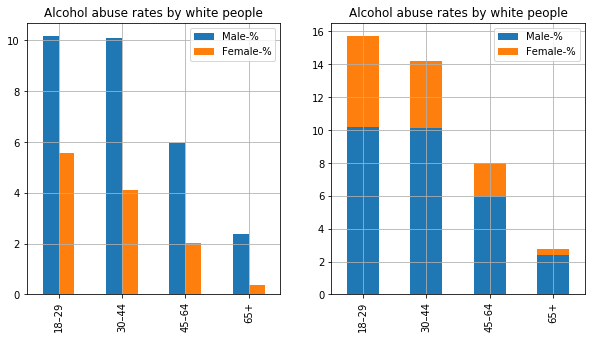

In [53]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
_ = ax1.set_title("Alcohol abuse rates by white people")
_ = percent[percent['race-ethnicity'].str.match('White')].plot.bar(ax=ax1)
_ = ax1.set_xticklabels(percent['characteristic'])
_ = ax1.grid()

_ = ax2.set_title("Alcohol abuse rates by white people")
_ = percent[percent['race-ethnicity'].str.match('White')].plot.bar(ax=ax2, stacked=True)
_ = ax2.set_xticklabels(percent['characteristic'])
_ = ax2.grid()

# Practice:
1. Try a different race-ethnicity & a different set of columns
2. Try an age group